# Homework 4: Natural Language Processing

## The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, puctuation, etc. of written sentences.
- 10 pt: Codes are written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

In [1]:
MY_UNIQNAME = 'huangmy'

# Download the data:
We will be using a subset of the data from [Project Gutenberg](http://www.gutenberg.org).

>Project Gutenberg is a volunteer effort to digitize and archive cultural works, to "encourage the creation and distribution of eBooks". It was founded in 1971 by American writer Michael S. Hart and is the oldest digital library. Most of the items in its collection are the full texts of public domain books. The project tries to make these as free as possible, in long-lasting, open formats that can be used on almost any computer., Project Gutenberg reached 57,000 items in its collection of free eBooks.

We will use a [cleaned up corpus](https://github.com/aparrish/gutenberg-dammit) that was processed by [Allison Parish](https://www.decontextualize.com/). This processing step was done to standardize metadata and text encoding. The dataset is described on the [project page](https://github.com/aparrish/gutenberg-dammit#gutenberg-dammit). Note that there are plain text files withing subdirectories numbered with the first three digits of the document ID, and there is also a JSON file of document metadata with title, author, and other information.


We created a reduced subset of 4000 documents for the purpose of this assignment that can be downloaded below:

https://drive.google.com/file/d/1V5ep_5veAccCD-YxGlVfv3DsXczBIvv5/view?usp=sharing

This ZIP file is approximately 550 MB compressed, and 1.45 GB uncompressed.

## Q1. (10 pts.) Data cleaning
- (3 pts.) Import the downloaded data
- (2 pts.) Convert to lowercase
- (2 pts.) Remove stopwords 
- (2 pts.) Remove punctuation and any other non-alphabet characters

In [93]:
# test a package before importing the downloaded data
from gutenbergdammit.ziputils import retrieve_one
# import the data and take the first text file as the example text
text = retrieve_one("data/homework4/gutenberg-dammit-files.zip", "000/00017.txt")
print(text[:50])

from gutenbergdammit.ziputils import loadmetadata
metadata = loadmetadata("data/homework4/gutenberg-dammit-files.zip")
# get all the txt address information in metadata
address = []
for item in metadata:
    address.append(item['gd-path'])
    
from gutenbergdammit.ziputils import searchandretrieve
# search for things -- find all 'Happy' in 'Title' parts
for info, text in searchandretrieve("data/homework4/gutenberg-dammit-files.zip", {'Title':'Happy'}):
    print(info['Title'][0], len(text))

THE BOOK OF MORMON

An Account Written

BY THE HAN
Happy-go-lucky 416751
The Happy Family 370735
Happy Days 6415


In [5]:
import spacy
# loading up the language model: English
import en_core_web_sm
nlp = en_core_web_sm.load()

In [6]:
import pathlib
content = {}
for i in range(len(address)):
    path = "data/homework4/gutenberg-dammit-files/"+str(address[i])
    p = pathlib.Path(path)
    content[i] = p.read_text(encoding='utf-8')
    if i%500 == 0:
        print(i)
# print(content[0])

0
500
1000
1500
2000
2500
3000
3500


In [7]:
# give number of files that need convert
import re
import os 
def FileToConvert(num):
    lower_text_corpus = {}
    for i in range(num):
        # convert to lower case
        # text = retrieve_one("data/homework4/gutenberg-dammit-files.zip", address[i])
        text = content[i]
        lower_text_corpus[address[i]] = text.lower()
        # print(i)
        # Remove punctuation and any other non-alphabet characters
        lower_text_corpus[address[i]] = re.sub(r'[^\w\s]', '', lower_text_corpus[address[i]])
        lower_text_corpus[address[i]] = lower_text_corpus[address[i]].replace(os.linesep, "")
        # exclude all the numbers there in the text
        lower_text_corpus[address[i]] = re.sub(r'[0-9]', '', lower_text_corpus[address[i]])
    return lower_text_corpus

number = 4000
preprocess_result_part = FileToConvert(number)

In [8]:
# Remove stopwords
from spacy.lang.en.stop_words import STOP_WORDS
def RemoveStop(address, text):
    lower_text_corpus_nonStop = {}
    for i in range(len(text)):
        words = text[address[i]].split()
        words_nostop = [word for word in words if word not in STOP_WORDS]
        lower_text_corpus_nonStop[address[i]] = words_nostop
    return lower_text_corpus_nonStop

result = RemoveStop(address, preprocess_result_part)
# print(result[address[0]])

### Comment:
* Here we use two methods to import the data. The first one is to use the package 'gutenberg-dammit' mentioned previously. The second one is to use 'pathlib' package. All the raw txt files have been stored in the 'content' dictionary. By calling function 'FileToConvert' and 'RemoveStop', we can filter out stop words and clean any number of files (including all the 4000 files). 

## Q2. (10 pts.) Frequency of Part of Speech (POS) tags
- Use spaCy
- (4 pts.) Extract POS tags from the first 100 sentences
- (4 pts.) Plot the frequency of POS tags
- (2 pts.) Provide your interpretation

In [9]:
# use the original data to operate
text_Q2 = retrieve_one("data/homework4/gutenberg-dammit-files.zip", address[0])
# just convert up to the max_length in each txt file
max_length = 20000
text_Q2_nlp = nlp(text_Q2[0:max_length])

# get POS tags in the first 100 sentences
pos_list = {}
sentence_num = 100
for i, sent in enumerate(text_Q2_nlp.sents):
    # print("__sentence__:", i)
    for token in sent:
        # print(token.text, "\t", token.pos_)
        if token.pos_ not in pos_list:
            pos_list[token.pos_] = 1
        else:
            pos_list[token.pos_] = pos_list[token.pos_] + 1
    if i > sentence_num - 1:
        break
print(pos_list)

{'PROPN': 323, 'ADP': 481, 'ADJ': 280, 'NOUN': 534, 'SPACE': 48, 'PART': 53, 'DET': 321, 'NUM': 83, 'PUNCT': 516, 'PRON': 136, 'CCONJ': 115, 'VERB': 429, 'ADV': 154, 'X': 31}


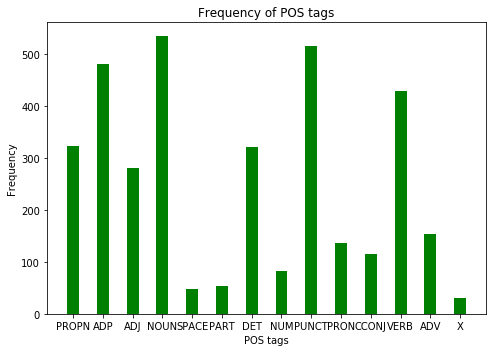

In [13]:
# Plot the frequency of POS tags and interpret
import numpy as np  
import matplotlib.pyplot as plt  
X = list(pos_list.keys())
Y = [pos_list[item] for item in X]
fig = plt.figure(figsize=(7,5))
plt.bar(X,Y,0.4,color="green")
plt.xlabel("POS tags")
plt.ylabel("Frequency")
plt.title("Frequency of POS tags") 
plt.tight_layout()

#### POS tags and their meaning:
* ADJ: adjective, ADP: adposition, ADV: adverb, AUX: auxiliary, CCONJ: coordinating conjunction, DET: determiner
* INTJ: interjection, NOUN: noun, NUM: numeral, PART: particle, PRON: pronoun, PROPN: proper noun
* PUNCT: punctuation, SCONJ: subordinating conjunction, SYM: symbol, VERB: verb, X: other

### Comment：
* Here we analyze the first 100 sentences in the file whose address is the first in metadata.
* All kinds of POS tags' frequency values are recorded in the dictionary and the frequency plot has been shown above.
* According to the plot, the first five tags with highest frequency are 'NOUN', 'PUNCT', 'ADP','VERB' and 'PROPN'. This result makes sense since noun, verb, adposition, punctuation and proper noun should be the most common words in sentence intuitively.
* The first three tags with lowest frequency are 'SPACE', 'PART' and 'NUM'. 

## Q3. (10 pts.) Make wordclouds for 5 books
- Use the [```word_cloud```](https://github.com/amueller/word_cloud) package.
- (8 pts.) Create a wordcloud for 5 books that you choose.
  - The author of each book should be different.
- (2pts.) Provide your interpretation.

In [14]:
# !conda install -y conda-forge wordcloud
# ! conda install -y pillow
# !pip install wordcloud

In [15]:
import wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def connect(list):
    return " ".join(str(i) for i in list)

Authors of the five chosen books are given:
['Giacomo Casanova', 'Alexander Wheelock Thayer', 'E. (Edith) Nesbit', 'William Habington', 'James Richardson']


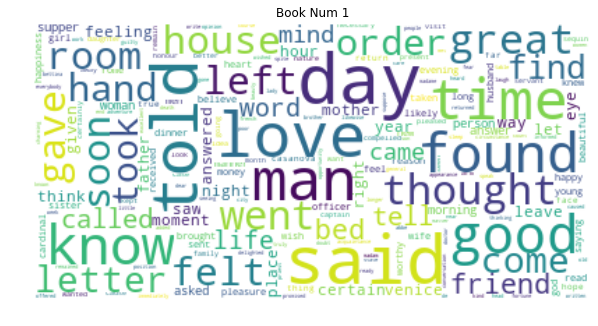

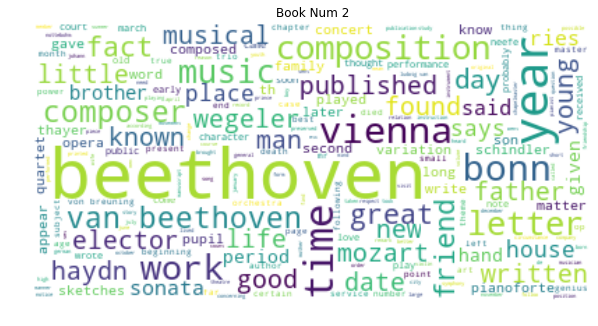

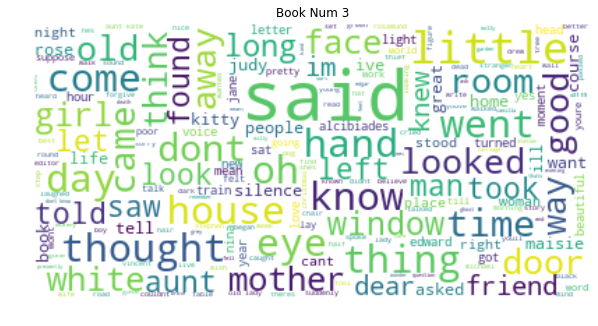

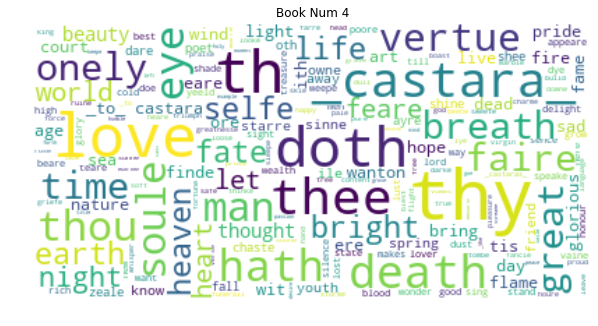

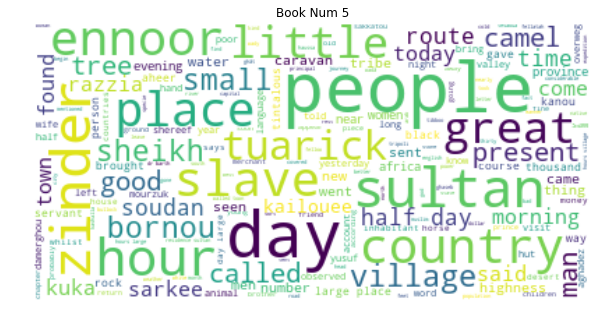

Titles of the five chosen books are given:


['The Memoirs of Jacques Casanova de Seingalt, Vol. I (of VI), "Venetian Years"\tThe First Complete and Unabridged English Translation, Illustrated with Old Engravings',
 'The Life of Ludwig van Beethoven, Volume I',
 'Man and Maid',
 'Castara\tThe Third Edition of 1640; Edited and Collated with the\tEarlier Ones of 1634, 1635',
 "Narrative of a Mission to Central Africa Performed in the Years 1850-51, Volume 2\tUnder the Orders and at the Expense of Her Majesty's Government"]

In [16]:
# take the first five files whose addresses are the first five in metadata file
FiveBook_ad = [item['gd-path'] for item in metadata[0:5]]
FiveBook_au = [item['Author'][0] for item in metadata[0:5]]
FiveBook_ti = [item['Title'][0] for item in metadata[0:5]]
print('Authors of the five chosen books are given:')
print(FiveBook_au)

# give the wordcloud for the first five books
count = 0
for ad in FiveBook_ad:
    count = count + 1
    # text = retrieve_one("data/homework4/gutenberg-dammit-files.zip", ad)
    text = connect(result[ad])
    # lower max_font_size, change the maximum number of word and lighten the background:
    wordcloud = WordCloud(max_font_size=50, background_color="white").generate(text)
    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title('Book Num '+str(count))
    plt.axis("off")
    plt.show()

print('Titles of the five chosen books are given:')
FiveBook_ti

#### General Interpretation of Word Cloud first:
* A Word Cloud or Tag Cloud is a visual representation of text data in the form of tags, which are typically single words whose importance is visualized by way of their size and color. 
* A Word Cloud is an excellent option to help visually interpret text and is useful in quickly gaining insight into the most prominent items in a given text, by visualizing the word frequency in the text as a weighted list.

### Comment:
* Authors of these five chosen books are 'Giacomo Casanova', 'Alexander Wheelock Thayer', 'E. (Edith) Nesbit', 'William Habington', 'James Richardson'. All of them are different.
* Titles of these five chosen books are 'The Memoirs of Jacques Casanova de Seingalt', 'Venetian Years-The First Complete and Unabridged English Translation, Illustrated with Old Engravings', 'The Life of Ludwig van Beethoven, Volume I',  'Man and Maid', 'Castara' and 'Narrative of a Mission to Central Africa Performed in the Years 1850-51'.
* The word cloud figures of these five books have also been shown above. All the stopwords have been deleted before plotting the word cloud figures.

### Word Clouds information:
* In the first book written by 'Giacomo Casanova', significant words contain 'thought', 'gave', 'love', 'day', 'good', 'time',
'man','great','left','letter', 'friend' and 'life'. This book is the memoirs of a person and most of these words indicate that  this person has good memory during that time.
* The second book is about Beethoven's life. Significant words contain 'Beethoven', 'elector', 'wegeler', 'music', 'life', 'young', 'composition', 'vienna', 'mozart','letter','composer' and 'father'. Keywords match the contents quite well.
* The third book is about Man and maid. Significant words contain 'friend', 'thought', 'eye', 'face', 'people', 'life', 'course', 'silence' and 'mother'. These words are quite common in relevant subjects as well.
* The fourth book is about Castara. Siginificant words contain 'fate', 'love', 'life', 'heart', 'vertue', 'death' and 'time'.
* The fifth book is about Mission to Central Africa. Significant words contain 'country', 'slave', 'people', 'tuarick', 'village', 'camel', 'route', 'zinder' and 'soudan'. These words can also reflect some of the contents covered in this book.

## Q4. (bonus 5 pts.) Train your own word2vec vector.
- Use the ```gensim``` package
  - Your input will be the output from Q1 (cleaned data)
- Hint: You can look into this tutorial for training the new Word2Vec model: https://rare-technologies.com/word2vec-tutorial/
- Use default parameters when you train the Word2Vec model (e.g., ```min_count```, ```size```, etc.), except the number of workers (```workers=?```) parameter.
- Use this model for the later questions. 
  - **If you do not have your Word2Vec model, please use the pre-trained model that we used for the lab to answer the later questions**

In [19]:
import gensim

In [45]:
# divide too long string -- max is 1000000
def avsplit2(s, n):
    if len(s) < 1000000:
        sr = [s]
    else:
        fn = len(s)//n
        rn = len(s)%n
        sr = []
        ix = 0
        for i in range(n):
            if i<rn:
                sr.append(s[ix:ix+fn+1])
                ix += fn+1
            else:
                sr.append(s[ix:ix+fn])
                ix += fn
    return sr

def contentToList(content_):
    content_split = avsplit2(content_, int(len(content_)/1000000)+1)
    pos_list = []
    for part_content_ in content_split:
        every_content_nlp = nlp(part_content_)
        for i, sent in enumerate(every_content_nlp.sents):
            # sent is a string
            sent = str(sent).lower()
            sent = re.sub(r'[^\w\s]', '', sent)
            sent = sent.replace(os.linesep, "")
            sent = re.sub(r'[0-9]', '', sent)
            # no-stop-words operation
            words = sent.split()
            words_nostop = [word for word in words if word not in STOP_WORDS]
            pos_list.append(words_nostop)
            # print(i)
    return pos_list


In [46]:
# content[0] is the first txt file
sentences = contentToList(content[0][0:100000])

In [83]:
my_model = gensim.models.Word2Vec(sentences)

### Comment for this training model:
* Idea: by utilizing .sent method in spacy, we can get a list of sentences in files. Sentences can be then turned into a list of words in order. Thus gensim can use the result as input to train the model. 
* Since there is a maximum length constraint in 'nlp', we can cut strings by calling 'avsplit2' function. By calling 'contentToList' function, we can turn strings into proper format for gensim to train the model.
* Here I only use part of the file whose address is the first in the metadata to train the model. Since the number of sentences used for training is too large, my computer crashes down for too many times. So sorry for this bad result, and this training model can only be considered as a sample here. If time permits, better server may get better training result.

## Q5. (10 pts.) Similarity from Word2Vec 
- Choose 5 words
- (5pts.) What are the top-10 similar words of each?
- (5pts.) How the results are different from the pre-trained model that we used in the lab?

In [22]:
# Use pre-trained model
w2v_mod = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300-SLIM.bin", binary=True)

In [49]:
chooseFive = ['father', 'time', 'friend', 'memory', 'happy']
pre_similar_dic = {}
for word_ in chooseFive:
    pre_similar_dic[word_] = [tuple_[0] for tuple_ in w2v_mod.most_similar(positive=[word_], topn=10)]
print(pre_similar_dic)

{'father': ['son', 'uncle', 'brother', 'grandfather', 'dad', 'mother', 'nephew', 'stepfather', 'grandson', 'sons'], 'time': ['day', 'moment', 'days', 'period', 'periods', 'when', 'times', 'weeks', 'hours', 'months'], 'friend': ['pal', 'friends', 'buddy', 'acquaintance', 'cousin', 'girlfriend', 'colleague', 'uncle', 'roommate', 'aunt'], 'memory': ['Memory', 'memories', 'remembering', 'Memories', 'NVRAM', 'RAM', 'EEPROM', 'NAND', 'remembrance', 'recollection'], 'happy': ['glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited']}


In [84]:
# Use my own model
pre_similar_dic = {}
for word_ in chooseFive:
    pre_similar_dic[word_] = [tuple_[0] for tuple_ in my_model.most_similar(positive=[word_], topn=10)]
print(pre_similar_dic)

C:\Users\TK\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  after removing the cwd from sys.path.


{'father': ['order', 'case', 'face', 'early', 'turn', 'view', 'soon', 'april', 'woman', 'truth'], 'time': ['italian', 'went', 'women', 'october', 'de', 'written', 'met', 'readers', 'corner', 'took'], 'friend': ['lived', 'matter', 'work', 'certain', 'leipzig', 'philosopher', 'young', 'left', 'dux', 'state'], 'memory': ['written', 'memoirs', 'order', 'words', 'wish', 'god', 'faith', 'french', 'says', 'blood'], 'happy': ['number', 'wrote', 'house', 'living', 'memory', 'true', 'mind', 'brockhaus', 'words', 'padua']}


### Comment for the comparison:
* Here I choose five words 'father', 'time', 'friend', 'memory' and 'happy' to compare. Top-10 similar words of each word in both two models have also been given in the output.
* Intuitively, our pre-trained model gives better result compared with my own word2vec model, which may be caused by my limit of training data.

## Q6. (15 pts.) Similarity between chapters 
- (5 pts.) Pick 5 chapters from the dataset and describe.
  - Each "chapter" consists of 10 consecutive paragraphs from a single book.
  - The author of each chapter should be different.
  - If necessary, explain how you defined "paragraph". 
- (5 pts.) Calculate the average of vectors for the words included in a chapter.  
  - In this way, you can have a vector that can roughly summarize the contents.    
  - The average vector should have the same dimensionality with word vectors 
    - e.g., if the word vector is a 100 dimension, the average vector for paragraph should be a 100 dimension as well
  - Words should come from the results of Q1 (cleaned out data) (i.e. should not contain stopwords or other special characters).
- (5 pts.) Calculate the similarity between chapters.  
  - Provide your interpretation. 
  - Why do you think some chapters are similar/dissimilar to others?

In [96]:
# Pick 5 chapters from the dataset and describe

# use nlp tools to separate paragraphs into sentences with position tags first
# use the funtion to filter paragraphs to form chapter
def chapterFound(text_, num_para):
    text_ = nlp(text_)
    count_sents = 0
    para = []
    chapter = []
    for i, sent in enumerate(text_.sents):
        if str(sent[-1]) == '.': # the end of sentence
            count_sents += 1
            para.append(sent)
        else: # should do something to separate
            if count_sents >= 1: # sentences accumulated
                para.append(sent) # finish recording current paragraph
                chapter.append(para) # add this para to chapter record
            else: # no sentences up to now -- start again
                chapter = []
            para = []
            count_sents = 0
        if len(chapter) == num_para:
            # print('Chapters found!')
            break
    if len(chapter) < num_para: # if not satisfied -- return blank chapter records
        chapter = []
    return chapter

In [99]:
np.random.seed(0)
address_shuf = np.random.permutation(address)
print(address_shuf)

['059/05944.txt' '013/01379.txt' '521/52188.txt' ... '194/19459.txt'
 '356/35637.txt' '509/50990.txt']


In [100]:
FiveChapters = {}
Chapter_author = []
Chapter_title = []

count_cha = 0
for i in range(len(address_shuf)):
    try_text = retrieve_one("data/homework4/gutenberg-dammit-files.zip", address_shuf[i])
    try_text = try_text[0:250000]
    Chapter = chapterFound(try_text, 10) # Each "chapter" consists of 10 consecutive paragraphs from a single book
    if Chapter != []:  # found the chapter
        location = address.index(address_shuf[i])
        FiveChapters[count_cha] = {} # set up dic for every book chapter
        FiveChapters[count_cha]['Author'] = metadata[location]['Author'][0]
        Chapter_author.append(metadata[location]['Author'][0])
        
        FiveChapters[count_cha]['Title'] = metadata[location]['Title'][0]
        Chapter_title.append(metadata[location]['Title'][0])
        
        FiveChapters[count_cha]['Chapter'] = Chapter # return a list containing 10 lists paragraphs
        count_cha += 1
    if len(FiveChapters) == 5:
        break

# give a sample output example
FiveChapters_result = FiveChapters
# FiveChapters_result is the dictionary that contains five chapters information together

In [102]:
print(Chapter_author)
print(Chapter_title) 
FiveChapters_result[0]

['Owen Wister', 'Charles William Domville-Fife', 'R. D. (Richard Doddridge) Blackmore', 'Work Projects Administration', 'Emma Marshall']
['A Straight Deal\tor The Ancient Grudge', 'Submarines, Mines and Torpedoes in the War', 'Slain By The Doones', 'Slave Narratives: a Folk History of Slavery in the United States\tFrom Interviews with Former Slaves\tMississippi Narratives', 'Salome']


{'Author': 'Owen Wister',
 'Title': 'A Straight Deal\tor The Ancient Grudge',
 'Chapter': [[She has shown herself, up till yesterday at least, grasping and
   unscrupulous., She is no worse than the others probably--possibly even
   better--but it would be doing our country an ill turn to persuade its
   citizens that England was anything less than an active, dangerous,
   competitor, especially in the infancy of our foreign trade., When
   a business rival gives you the glad hand and asks fondly after the
   children, beware lest the ensuing emotions cost you money.
   ], ["No: our distrust for England has not its life and being in
   pernicious textbooks., To really believe that would be an insult to our
   intelligence--even grudges cannot live without real food., Should
   England become helpless tomorrow, our animosity and distrust would die
   to-morrow, because we would know that she had it no longer in her power
   to injure us., Therein lies the feeling--the textbooks merely e

### Comment for 5 Chapters:
* Authors of these five randomly chosen books are 'Owen Wister', 'Charles William Domville-Fife', 'R. D. (Richard Doddridge) Blackmore', 'Work Projects Administration', 'Emma Marshall'. And all of them are different.
* Titles of these five chosen books are 'A straight Deal or the Ancient Grudge', 'Submarines, Mines and Torpedoes in the War', 'Slain By The Doones', 'Slave Narratives: a Folk History of Slavery in the United States--From Interviews with Former Slaves--Mississippi Narratives', 'Salome'
* All Chapter text contents have been recorded in the dictionary 'FiveChapters_result'. The output above is the sample output for the first Chapter in the dictionary.

### Explanation for the 'Paragraph':
* A complete sentence should be ended with a period '.'. In order to be a paragraph, the text string should contain at least one sentence. Once some blanks are detected at the end of the sentence, then current paragraph should come to an end. Thus if 10 consecutive paragraphs have been detected in a single file, then we take them as a whole chapter.

In [184]:
# Here we use the pre-trained model
# Calculate the average of vectors for the words included in a chapter.
# turn text string into words list with no stop words
def Text_clean_word_list(text_):
    text_ = text_.lower()
    text_ = re.sub(r'[^\w\s]', '', text_)
    final_text_ = text_.replace(os.linesep, "")
    words = final_text_.split()
    words_nostop = [word for word in words if word not in STOP_WORDS]
    return words_nostop

# set up the word set for the whole chapter
def chapter_word_list(chapter_):
    # chapter_ is 'list in list' type
    list_ = []
    for i in range(len(chapter_)):
        list_ = list_ + Text_clean_word_list(str(chapter_[i]))
    list_ = list(set(list_))
    return list_
# print(chapter_word_list(FiveChapters_result[0]['Chapter']))

def avg_vector(list_):
    vector_ = np.zeros((300,))
    # make sure that all words are in the w2v_mod vocab dic
    filter_list_ = [word for word in list_ if word in w2v_mod.vocab]
    for word in filter_list_:
        vector_ = vector_ + w2v_mod[word]
    return vector_/len(filter_list_)

# try0 = chapter_word_list(FiveChapters_result[0]['Chapter'])
# len(avg_vector(try0))

In [188]:
avg_vector_dic = {}
for i in range(len(FiveChapters_result)):
    avg_vector_dic[i] = avg_vector(chapter_word_list(FiveChapters_result[i]['Chapter']))
print(avg_vector_dic[0])

[ 2.98116096e-02  2.23528509e-02  5.05169306e-03  2.60319652e-02
 -2.39035138e-02  8.38667890e-03  3.36196354e-02 -2.92289233e-02
  3.62194354e-02  2.15227566e-02  8.61259431e-04 -4.06998587e-02
 -2.06307011e-02  1.75365602e-02 -3.50327200e-02  2.76009193e-02
  7.25349891e-03  3.20912431e-02  5.99356352e-03 -1.95958604e-02
 -3.45687867e-03  4.97225748e-03 -1.23198048e-02 -1.48238093e-03
  1.76417816e-02 -2.38608972e-02 -2.30282788e-02  1.93062658e-02
  6.06712750e-03 -1.21633586e-02 -1.25563406e-02 -6.77085446e-03
 -1.56929536e-02  1.35621116e-02 -2.69062612e-04 -1.07730984e-02
  1.14789189e-02 -9.63154644e-03  9.03398864e-03  1.37548330e-02
  2.47430681e-02  3.36060002e-03  3.73225569e-02  5.65185251e-04
  2.07233677e-03 -3.09968530e-02 -2.23537738e-02  5.52930740e-03
 -8.43687694e-03 -1.98854840e-03 -1.33654003e-02  4.85563636e-03
 -7.12752437e-03 -8.86569473e-03  3.25923584e-03  1.19119975e-02
 -2.04678782e-02 -3.29235921e-02  1.10361118e-02 -2.07942402e-02
  1.72300979e-03  2.45645

### Comment for average of vectors:
* Here we use the pre-trained model.
* We use the 5 chapters that have been found in previous questions. Before calculating the average word vectors, we use similar methods in Q1 to filter words. Using the package 'gensim' -- w2v_mod, the dimension of word vectors is 300. Then we can calculate the average word vectors for a certain Chapter by averaging all its words' word vectors. Thus the results can be used to summarize the contents in these chapters.
* We get 5 average word vectors which have been recorded in the 'avg_vector_dic' dictionary. The above result shows the sample output of the first average word vector.

In [194]:
# Calculate the similarity between chapters.
similarity_cal = {0:{}, 1:{}, 2:{}, 3:{}, 4:{}}
avg_simi = 0
for i in range(len(avg_vector_dic)):
    for j in range(len(avg_vector_dic)):
        temp = (np.sqrt(np.sum(np.power(avg_vector_dic[i], 2))) * np.sqrt(np.sum(np.power(avg_vector_dic[j], 2))))
        similarity_cal[i][j] = avg_vector_dic[i].dot(avg_vector_dic[j]) / temp
        if i != j:
            avg_simi = avg_simi + similarity_cal[i][j]
avg_simi = avg_simi/20
print('Average of all the pair similarity scores')
print(avg_simi)
print('Pair similarity scores among these 5 chapters:')
similarity_cal

Average of all the pair similarity scores
0.8271377178536877
Pair similarity scores among these 5 chapters:


{0: {0: 0.9999999999999999,
  1: 0.8750223003622345,
  2: 0.885566959451344,
  3: 0.8858460573905959,
  4: 0.8069141497816327},
 1: {0: 0.8750223003622345,
  1: 1.0000000000000002,
  2: 0.8177454773725552,
  3: 0.8867890936580463,
  4: 0.745530445441324},
 2: {0: 0.885566959451344,
  1: 0.8177454773725552,
  2: 1.0000000000000002,
  3: 0.8385379820656943,
  4: 0.7929271609988903},
 3: {0: 0.8858460573905959,
  1: 0.8867890936580463,
  2: 0.8385379820656943,
  3: 0.9999999999999999,
  4: 0.7364975520145602},
 4: {0: 0.8069141497816327,
  1: 0.745530445441324,
  2: 0.7929271609988903,
  3: 0.7364975520145602,
  4: 0.9999999999999999}}

### Comment for similarity between chapters:
* Based on the 5 chapters that we get in the previous question, their pair similarity scores have also been calculated. The output has been shown above in the 'similarity_cal' dictionary. The average of all the pair similarity scores is 0.8271377178536877. Thus one possible method to tell the similarity is to compare similarity scores with the average value.
* According to the output, similarity scores of Chapter0 to Chapter1, Chapter0 to Chapter2, Chapter0 to Chapter3, Chapter1 to Chapter3, Chapter2 to Chapter3 are higher than the average value. Thus we can tell that these chapters are similar to each other. And Chapter4 is not similar to other Chapters.

## Q7. (15 pts.) Identify biases in word embeddings
- (8pts.) Which words from the model show the strongest skew along the each bias scales?
  - Look for the interpretable semantic scaling method from the last Lab's 2-3
  - Search for the words from your Word2Vec model that would locate in the scale's each end
    - e.g., which words are more male/female? 
  - Use following semantic scales
    - *Gender (male:female)*
    - *Age (young:old)*
  - Provide your interpretation
- (7pts.) Pick the top 100 similar words with the word *information*. 
  - Plot these words in a 2-dimensional scale. 
  - Each axis is a bias scale from above (gender and age). 
  - Provide your interpretation


In [71]:
import pandas as pd
import seaborn as sns
from scipy import spatial

def cosine_similarity(x, y):
    return(1 - spatial.distance.cosine(x, y))

In [89]:
# Find words from the model that show the strongest skew along the each bias scales
# Here we use the pre-trained model
# under gender scale
vocab_list = list(w2v_mod.vocab.keys())
vocab_dataframe = []
for i in range(len(vocab_list)):
    temp_frame = [cosine_similarity(w2v_mod[vocab_list[i]], w2v_mod['male']), \
                  cosine_similarity(w2v_mod[vocab_list[i]], w2v_mod['female'])]
    vocab_dataframe.append(temp_frame)  
pol_words_sim_2d = pd.DataFrame(vocab_dataframe, index=vocab_list, columns=['male', 'female'])
pol_words_sim_2d['female-male'] = pol_words_sim_2d['female'] - pol_words_sim_2d['male']
pol_words_sim_2d.head()

,male,female,female-male
in,0.130080,0.155057,0.024977
for,0.070793,0.069224,-0.001568
that,0.092533,0.100569,0.008036
is,0.097253,0.096522,-0.000731
on,0.031677,0.032717,0.001040


In [90]:
pol_words_sim_2d.sort_values(['female-male'], ascending=False).head(10)

,male,female,female-male
Lady,0.031013,0.194264,0.163251
female,0.840533,1.000000,0.159467
lady,0.267635,0.418362,0.150726
Alumna,0.034717,0.185337,0.150619
herself,0.181761,0.332038,0.150277
WNBA,0.055715,0.205066,0.149351
alumna,0.080805,0.226077,0.145272
businesswomen,0.190848,0.334408,0.143560
chairwoman,-0.101660,0.040395,0.142055
Cowgirl,0.061202,0.201209,0.140007


In [91]:
pol_words_sim_2d.sort_values(['female-male'], ascending=True).head(10)

,male,female,female-male
males,0.757962,0.572926,-0.185035
Patrolman,0.090480,-0.094369,-0.184849
Uncle,0.074727,-0.101167,-0.175893
Patrolmen,0.066421,-0.097451,-0.163872
male,1.000000,0.840533,-0.159467
goatee,0.225125,0.072592,-0.152532
jakes,0.331415,0.182899,-0.148516
bowhead,0.256691,0.111090,-0.145601
Detective,0.104905,-0.040270,-0.145175
caucasian,0.493518,0.350908,-0.142610


### Comment under 'Gender' scale:
* Here we use the pre-trained model.
* All the words in the vocabulary list have been considered. All words' cosine similarity scores with words 'male' and 'female' have been calculated. After sorting by the scores difference, we can tell the words that show the strongest skew along each bias scales.

### Result:
* According to the output, 'Lady', 'lady', 'female', 'Alumna', 'herself', 'WNBA', 'alumna', 'businesswoman', 'chairwoman' and 'Cowgirl' are more female in the vocabulary.
* And 'males', 'Patrolman', 'Uncle', 'Patrolmen', 'male', 'goatee', 'jakes', 'bowhead', 'Detective' and 'caucasian' are more male in the vocabulary.

In [92]:
# under age scale
vocab_dataframe = []
for i in range(len(vocab_list)):
    temp_frame = [cosine_similarity(w2v_mod[vocab_list[i]], w2v_mod['young']), \
                  cosine_similarity(w2v_mod[vocab_list[i]], w2v_mod['old'])]
    vocab_dataframe.append(temp_frame)  
pol_words_sim_2d = pd.DataFrame(vocab_dataframe, index=vocab_list, columns=['young', 'old'])
pol_words_sim_2d['young-old'] = pol_words_sim_2d['young'] - pol_words_sim_2d['old']
pol_words_sim_2d.head()

,young,old,young-old
in,0.144150,0.137179,0.006972
for,0.133175,0.119700,0.013475
that,0.215225,0.120002,0.095223
is,0.129671,0.136122,-0.006451
on,0.021745,0.041102,-0.019357


In [88]:
pol_words_sim_2d.sort_values(['young-old'], ascending=False).head(10)

,young,old,young-old
young,1.000000,0.417434,0.582566
encouragers,0.348029,-0.045571,0.393601
talented,0.539768,0.151512,0.388255
careers,0.360948,-0.019751,0.380699
mentors,0.411530,0.033015,0.378515
opportunities,0.231558,-0.133907,0.365464
youth,0.571578,0.211670,0.359909
educated,0.422287,0.063182,0.359104
mentorship,0.359126,0.000690,0.358435
Impressionable,0.487895,0.138913,0.348982


In [81]:
pol_words_sim_2d.sort_values(['young-old'], ascending=True).head(10)

,young,old,young-old
old,0.417434,1.000000,-0.582566
stepdaughter,0.150060,0.468802,-0.318742
Katherinne,0.141381,0.425061,-0.283680
ago,0.111998,0.392503,-0.280505
resident,0.090268,0.364764,-0.274496
CARLSTADT,-0.061621,0.211670,-0.273291
tabby,0.057961,0.330714,-0.272752
earlier,0.044396,0.310022,-0.265626
daughter,0.264342,0.528177,-0.263835
granddaughter,0.227079,0.489140,-0.262061


### Comment under 'Age' scale:
* Here we use the pre-trained model.
* All the words in the vocabulary list have been considered. All words' cosine similarity scores with words 'young' and 'old' have been calculated. After sorting by the scores difference, we can tell the words that show the strongest skew along each bias scales.

### Result:
* According to the output, 'young', 'encouragers', 'talented', 'careers', 'mentors', 'opportunities', 'youth', 'educated','mentorship' and 'Impressionable' are more young in the vocabulary.
* And 'old', 'stepdaughter', 'Katherinne', 'ago', 'resident', 'CARLSTADT', 'tabby', 'earlier', 'daughter' and 'granddaughter' are more old in the vocabulary.

In [69]:
# Pick the top 100 similar words with the word information
# Here we use the pre-trained model
simi_information = w2v_mod.most_similar(positive=['information'], topn=100)
simi_info_list = [tuple_[0] for tuple_ in simi_information]
print(simi_info_list)

['info', 'informationon', 'Information', 'details', 'data', 'TENFOLD', 'contact', 'Details', 'updates', 'availableat', 'informations', 'detailed', 'particulars', 'documents', 'Info', 'confidential', 'documentation', 'database', 'databases', 'knowledge', 'tidbits', 'disseminate', 'nonconfidential', 'facts', 'website', 'contacting', 'clues', 'nonprivileged', 'web', 'actionable', 'ecm', 'insights', 'www', 'evidence', 'PressRoom', 'summaries', 'disclosures', 'Website', 'tips', 'dissemination', 'Inquiries', 'pertinent', 'FAQs', 'Detailed', 'email', 'specifics', 'answers', 'HYPERLINK', 'insight', 'descriptions', 'Data', 'subpoenaes', 'nonpublic', 'nonsensitive', 'resources', 'regarding', 'brochure', 'confidentially', 'statistics', 'material', 'disclosure', 'infos', 'LInX', 'accessed', 'orby', 'relevant', 'disseminating', 'summary', 'materials', 'disclosing', 'REFILL', 'tidbit', 'call', 'newsflashes', 'brochures', 'feedback', 'inquire', 'iST', 'misinformation', 'alerts', 'notification', 'wher

In [103]:
# create information similar words dataframe
information_dataframe = []
for i in range(len(simi_information)):
    temp_frame = [cosine_similarity(w2v_mod[simi_info_list[i]], w2v_mod['male']), \
                  cosine_similarity(w2v_mod[simi_info_list[i]], w2v_mod['female'])]
    information_dataframe.append(temp_frame)  
pol_words_sim_2d = pd.DataFrame(information_dataframe, index=simi_info_list, columns=['male', 'female'])

pol_words_sim_2d.head(10)

,male,female
info,-0.004822,0.016588
informationon,-0.008636,0.009880
Information,-0.007543,-0.010672
details,-0.024264,-0.032860
data,0.053522,0.008963
TENFOLD,0.080223,0.080885
contact,0.075858,0.112099
Details,0.014644,-0.007519
updates,-0.073659,-0.044609
availableat,-0.008539,-0.019428


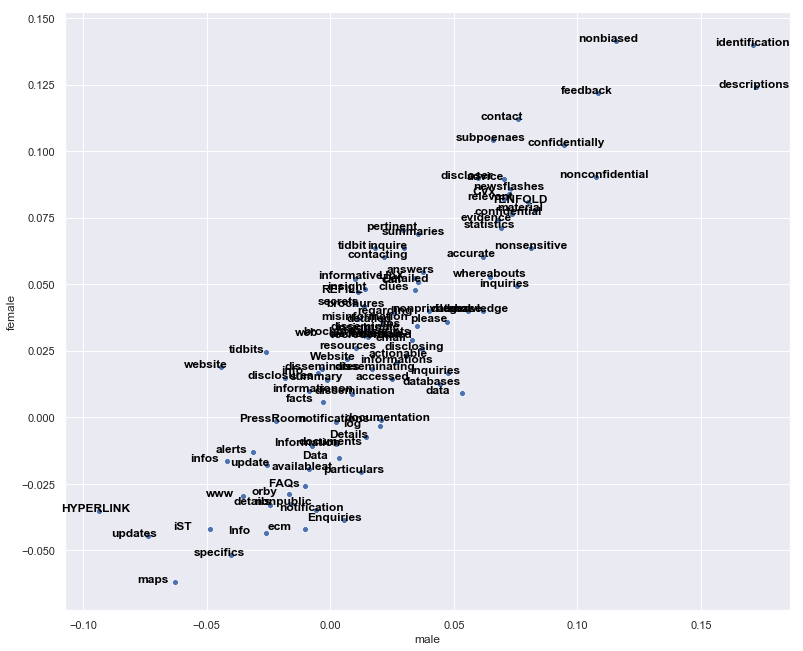

In [104]:
# sns.scatterplot(x='male', y='female', data=pol_words_sim_2d, hue=pol_words_sim_2d.index)
sns.set(rc={'figure.figsize':(13,11)})
p1 = sns.scatterplot(x='male', y='female', data=pol_words_sim_2d)
# add annotations one by one with a loop
for line in range(0, pol_words_sim_2d.shape[0]):
     p1.text(pol_words_sim_2d.male[line]-0.015, pol_words_sim_2d.female[line],\
             pol_words_sim_2d.index.tolist()[line], horizontalalignment='left', \
             size='medium', color='black', weight='semibold')

In [105]:
# create information similar words dataframe
information_dataframe = []
for i in range(len(simi_information)):
    temp_frame = [cosine_similarity(w2v_mod[simi_info_list[i]], w2v_mod['young']), \
                  cosine_similarity(w2v_mod[simi_info_list[i]], w2v_mod['old'])]
    information_dataframe.append(temp_frame)  
pol_words_sim_2d = pd.DataFrame(information_dataframe, index=simi_info_list, columns=['young', 'old'])

pol_words_sim_2d.head(10)

,young,old
info,-0.005752,-0.064372
informationon,-0.041600,-0.091315
Information,-0.046439,-0.032040
details,-0.020312,-0.097730
data,-0.074401,-0.076039
TENFOLD,0.027952,0.016618
contact,0.035649,-0.088061
Details,-0.016970,-0.079681
updates,-0.081138,-0.053426
availableat,-0.089751,-0.092819


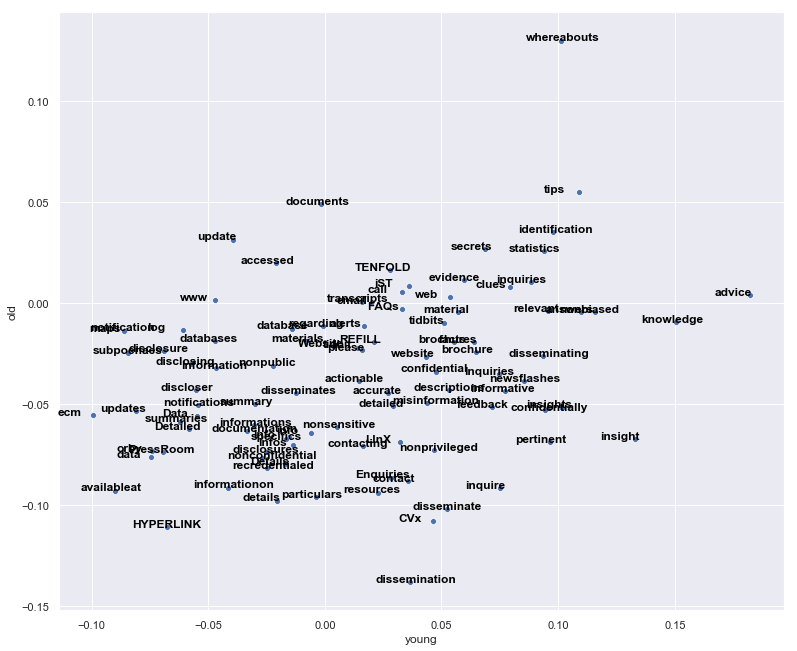

In [106]:
# sns.scatterplot(x='young', y='old', data=pol_words_sim_2d)
sns.set(rc={'figure.figsize':(13,11)})
p1 = sns.scatterplot(x='young', y='old', data=pol_words_sim_2d)
# add annotations one by one with a loop
for line in range(0, pol_words_sim_2d.shape[0]):
     p1.text(pol_words_sim_2d.young[line]-0.015, pol_words_sim_2d.old[line],\
             pol_words_sim_2d.index.tolist()[line], horizontalalignment='left', \
             size='medium', color='black', weight='semibold')

### Comment and Interpretation:
* Here we use the pre-trained model.
* Top 100 similar words with the word 'information' have been shown in the output.
* These words have also been plotted in 2-dimensional scale 'Gender' and 'Age'.

### Interpretation:
* It can be seen that in 'Gender' scale, there is a trend in the plot. Most of these 100 words have quite similar cosine similarities with word 'male' and 'female'. Thus it can be taken as one common feature for these words in 'Gender' scale.
Also, if we take the difference between these two values as the bias, then these 100 words' bias should be small. While in 'Age' scale, there is no obvious trends in this plot. Points are almost randomly distributed in this plot. Relationship of similarities with word 'young' and 'old' is also a little bit hard to tell. Part of the words should have some bias in 'Age' scale.

## Q8. (10 pts.) Word clustering
- Pick top-100 similar words with the word *information*.  
- Calculate cosine similarity scores between words
  - e.g., Create a 100x100 matrix that contains cosine similarity scores. Each row and columns should be words. 
- Use seaborn's [```.clustermap()```](https://seaborn.pydata.org/generated/seaborn.clustermap.html) function to draw a hierarchically-clustered heatmap
- Provide your interpretation

In [258]:
# use simi_info_list
words_similarity_frame = []
# create similarity words dataframe
for i in range(len(simi_info_list)):
    temp_frame = []
    for j in range(len(simi_info_list)):
        temp_frame.append(cosine_similarity(w2v_mod[simi_info_list[i]], w2v_mod[simi_info_list[j]]))
    words_similarity_frame.append(temp_frame)  

pol_words_sim_matrix = pd.DataFrame(words_similarity_frame, index=simi_info_list, columns=simi_info_list)
pol_words_sim_matrix.head()

,info,informationon,Information,details,data,TENFOLD,contact,Details,updates,availableat,...,Enquiries,transcripts,informative,accurate,maps,secrets,discloser,please,nonbiased,update
info,1.000000,0.543771,0.397066,0.570410,0.346907,0.443771,0.389036,0.480971,0.501436,0.453379,...,0.251594,0.218130,0.317617,0.214786,0.321741,0.322509,0.316399,0.477491,0.218569,0.341084
informationon,0.543771,1.000000,0.417734,0.438872,0.320277,0.531087,0.402642,0.405368,0.408649,0.527021,...,0.321985,0.238636,0.320283,0.237753,0.296420,0.176603,0.291068,0.317414,0.253228,0.281296
Information,0.397066,0.417734,1.000000,0.337084,0.371269,0.357362,0.233841,0.421640,0.233407,0.421761,...,0.393524,0.276182,0.140331,0.112876,0.197199,0.161183,0.224050,0.199983,0.147850,0.149125
details,0.570410,0.438872,0.337084,1.000000,0.267909,0.314679,0.324619,0.721666,0.403563,0.325376,...,0.293647,0.288114,0.220828,0.154763,0.253278,0.355164,0.303263,0.302934,0.163573,0.337170
data,0.346907,0.320277,0.371269,0.267909,1.000000,0.184470,0.057502,0.167773,0.285520,0.244271,...,0.137385,0.342926,0.149244,0.268031,0.398754,0.189227,0.257193,0.048890,0.224573,0.244552


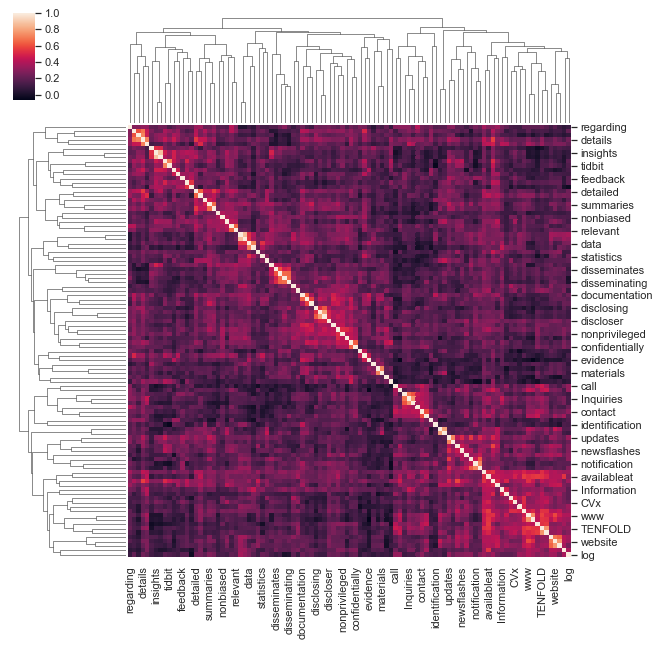

In [259]:
sns.clustermap(pol_words_sim_matrix)

### Comment:
* Top 100 similar words with the word 'information' have been recorded in the 'simi_info_list' dictionary. Cosine similarity socres between words have been calculated. Part of the results are given in the ouput above including the 100x100 matrix that contains cosine similarity scores. 
* seaborn's clustermap plot has been shown above.

### Interpretation:
* Diagonal cosine similarity scores are 1 since words are compared to themselves. From the clustermap, it can be seen that similarity scores around the diagonal are relatively higher than the other values, which also indicates high similarity.
* Words clusters and their labels have also been given in the above map.